<a href="https://colab.research.google.com/github/mouctarbalde/concrete-strength-prediction/blob/main/Cement_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
import warnings
import random
seed = 42
random.seed(seed)
import numpy as np
np.random.seed(seed)
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mouctarbalde/concrete-strength-prediction/main/Train.csv')

In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
columns_name = df.columns.to_list()
columns_name =['Cement',
 'Blast_Furnace_Slag',
 'Fly_Ash',
 'Water',
 'Superplasticizer',
 'Coarse Aggregate',
 'Fine Aggregate',
 'Age_day',
 'Concrete_compressive_strength']
df.columns = columns_name
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast_Furnace_Slag             1030 non-null   float64
 2   Fly_Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age_day                        1030 non-null   int64  
 8   Concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
df.shape

(1030, 9)

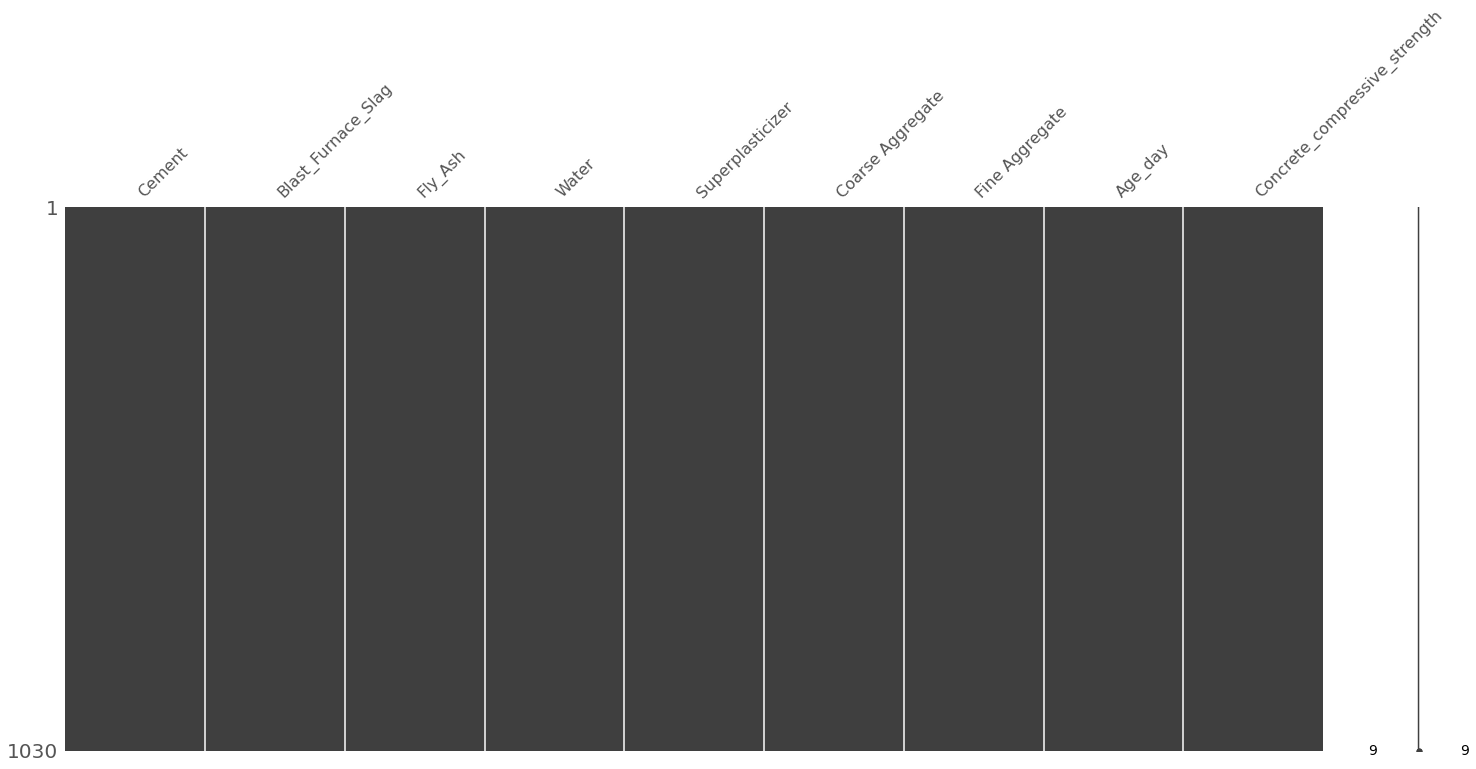

In [6]:
import missingno as ms
ms.matrix(df)

In [7]:
df.isna().sum()

Cement                           0
Blast_Furnace_Slag               0
Fly_Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age_day                          0
Concrete_compressive_strength    0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast_Furnace_Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly_Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age_day,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Concrete_compressive_strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


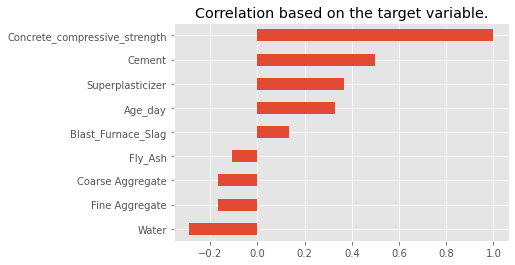

In [9]:
df.corr()['Concrete_compressive_strength'].sort_values().plot(kind='barh')
plt.title("Correlation based on the target variable.")
plt.show()

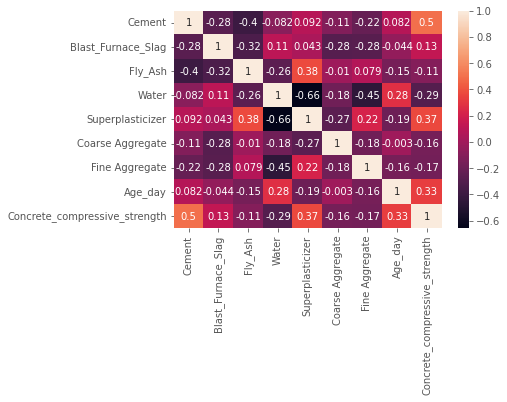

In [10]:
sns.heatmap(df.corr(),annot=True)

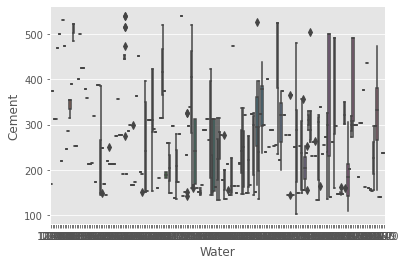

In [11]:
sns.boxplot(x='Water', y = 'Cement',data=df)

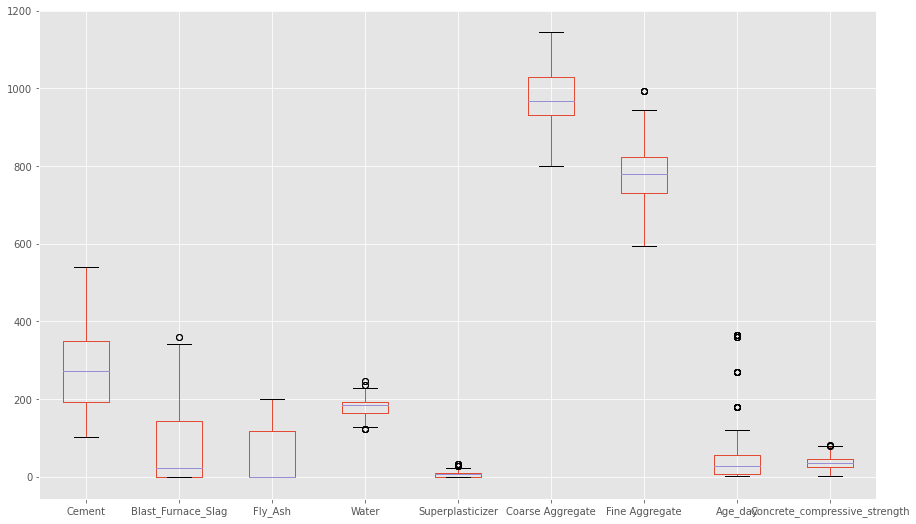

In [12]:
plt.figure(figsize=(15,9))
df.boxplot()


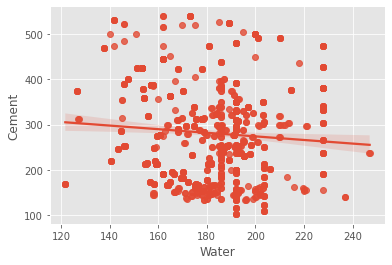

In [13]:
sns.regplot(x='Water', y = 'Cement',data=df)

As we can see from the above cell there is not correlation between **water** and our target variable.

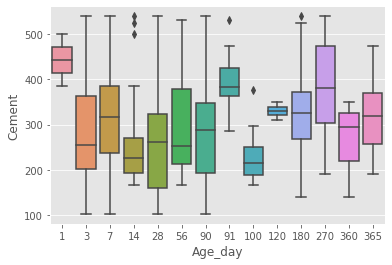

In [14]:
sns.boxplot(x='Age_day', y = 'Cement',data=df)

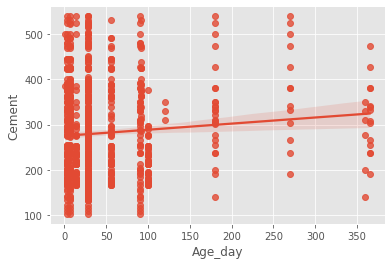

In [15]:
sns.regplot(x='Age_day', y = 'Cement',data=df)

In [16]:
X = df.drop('Concrete_compressive_strength',axis=1)
y = df.Concrete_compressive_strength

In [17]:
X.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age_day
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [18]:
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Concrete_compressive_strength, dtype: float64

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=.2, random_state=seed)

In [20]:
X_train.shape ,y_train.shape

((824, 8), (824,))

In our case we notice from our analysis the presence of outliers although they are not many we are going to use Robustscaler from sklearn to scale the data.

Robust scaler is going to remove the median and put variance to 1 it will also transform the data by removing outliers(24%-75%) is considered.

In [21]:
scale = RobustScaler()

# note we have to fit_transform only on the training data. On your test data  you only have to transform.
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [22]:
X_train

array([[-0.6938654 ,  0.87653255,  0.9805579 , ..., -0.13535912,
        -0.62238687,  0.        ],
       [ 0.8868374 ,  0.        ,  1.11580727, ..., -1.34438306,
        -0.30166711,  0.        ],
       [ 0.        , -0.15195994,  1.02620456, ...,  0.78821363,
        -0.01058481, -0.57142857],
       ...,
       [-0.50506254, -0.15195994,  1.05832629, ...,  1.02209945,
         0.21593014,  1.64571429],
       [ 1.19058964,  0.66862373,  0.        , ..., -1.06721915,
         0.03175443,  0.        ],
       [ 0.23168553, -0.15195994,  0.95519865, ..., -0.39594843,
         0.04763165,  0.        ]])

# Model creation

### Linear Regression

In [23]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [24]:
pred_lr = lr.predict(X_test)
pred_lr[:10]

array([59.65804162, 52.0412113 , 63.53513339, 51.57545676, 17.22001733,
       39.86561321, 26.6982471 , 44.73648869, 29.36619785, 38.18612542])

In [25]:
mae_lr = mean_absolute_error(y_test,pred_lr)
r2_lr = r2_score(y_test,pred_lr)
print(f'Mean absolute error of linear regression is {mae_lr}')
print(f'R2 score of Linear Regression is {r2_lr}')

Mean absolute error of linear regression is 7.745559243921439
R2 score of Linear Regression is 0.6275531792314843


**Graph for linear regression** the below graph is showing the relationship between the actual and the predicted values.

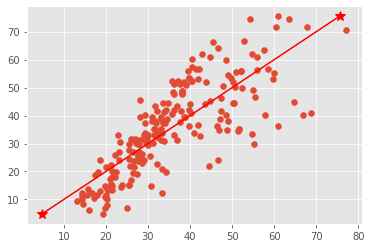

In [26]:
fig, ax = plt.subplots()
ax.scatter(pred_lr, y_test)
ax.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], color = 'red', marker = "*", markersize = 10)

### Decision tree Regression

In [27]:
dt = DecisionTreeRegressor(criterion='mae')
dt.fit(X_train,y_train)

pred_dt = dt.predict(X_test)

mae_dt = mean_absolute_error(y_test,pred_dt)
r2_dt = r2_score(y_test,pred_dt)
print(f'Mean absolute error of linear regression is {mae_dt}')
print(f'R2 score of Decision tree regressor is {r2_dt}')

Mean absolute error of linear regression is 5.170145631067961
R2 score of Decision tree regressor is 0.7424150392589254


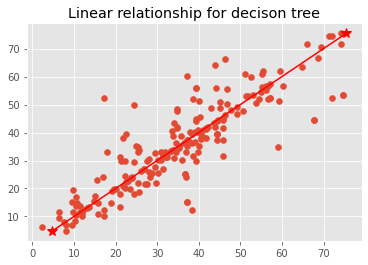

In [28]:
fig, ax = plt.subplots()
plt.title('Linear relationship for decison tree')
ax.scatter(pred_dt, y_test)
ax.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], color = 'red', marker = "*", markersize = 10)

### Random Forest Regression

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# prediction
pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test,pred_rf)
r2_rf = r2_score(y_test,pred_rf)

print(f'Mean absolute error of Random forst regression is  {mae_rf}')
print(f'R2 score of Random forst regressor is {r2_rf}')

Mean absolute error of Random forst regression is  3.736345008668516
R2 score of Random forst regressor is 0.8846424240028741


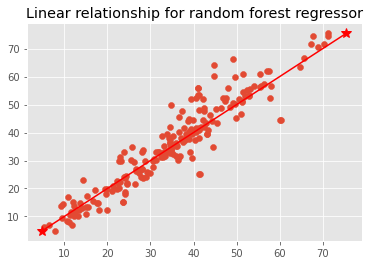

In [31]:
fig, ax = plt.subplots()
plt.title('Linear relationship for random forest regressor')
ax.scatter(pred_rf, y_test)
ax.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], color = 'red', marker = "*", markersize = 10)

# Lasso Regression

In [34]:
laso = Lasso()
laso.fit(X_train, y_train)
pred_laso = laso.predict(X_test)

mae_laso = mean_absolute_error(y_test, pred_laso)
r2_laso = r2_score(y_test, pred_laso)

print(f'Mean absolute error of Random forst regression is  {mae_laso}')
print(f'R2 score of Random forst regressor is {r2_laso}')

Mean absolute error of Random forst regression is  8.792670141747196
R2 score of Random forst regressor is 0.5562659499743227


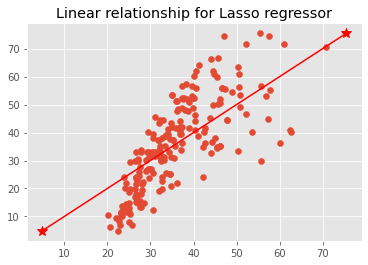

In [36]:
fig, ax = plt.subplots()
plt.title('Linear relationship for Lasso regressor')
ax.scatter(pred_laso, y_test)
ax.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], color = 'red', marker = "*", markersize = 10)

In [38]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

pred_gb = gb.predict(X_test)

mae_gb = mean_absolute_error(y_test, pred_gb)
r2_gb = r2_score(y_test, pred_gb)

print(f'Mean absolute error of Random forst regression is  {mae_gb}')
print(f'R2 score of Random forst regressor is {r2_gb}')

Mean absolute error of Random forst regression is  4.1289993674027725
R2 score of Random forst regressor is 0.8835272597908818


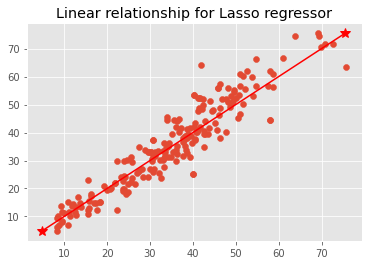

In [39]:
fig, ax = plt.subplots()
plt.title('Linear relationship for Lasso regressor')
ax.scatter(pred_gb, y_test)
ax.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], color = 'red', marker = "*", markersize = 10)

# Stacking Regressor:
combining multiple regression model and choosing the final model. in our case we used kfold cross validation to make sure that the model is not overfitting.

In [41]:
estimators = [('lr',LinearRegression()), ('gb',GradientBoostingRegressor()),\
              ('dt',DecisionTreeRegressor()), ('laso',Lasso())]

In [44]:
from sklearn.model_selection import  KFold

kf = KFold(n_splits=10,shuffle=True, random_state=seed)
stacking = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor(random_state=seed), cv=kf)

stacking.fit(X_train, y_train)

pred_stack = stacking.predict(X_test)

mae_stack = mean_absolute_error(y_test, pred_stack)
r2_stack = r2_score(y_test, pred_stack)

print(f'Mean absolute error of Random forst regression is  {mae_stack}')
print(f'R2 score of Random forst regressor is {r2_stack}')


Mean absolute error of Random forst regression is  4.196688430420712
R2 score of Random forst regressor is 0.8748435628075502


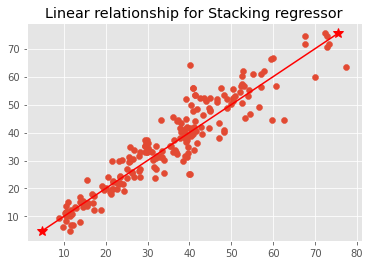

In [45]:
fig, ax = plt.subplots()
plt.title('Linear relationship for Stacking regressor')
ax.scatter(pred_stack, y_test)
ax.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], color = 'red', marker = "*", markersize = 10)

In [48]:
result = pd.DataFrame({'Model':['Linear Regression','Decison tree','Random Forest', 'Lasso',\
                                'Gradient Boosting Regressor', 'Stacking Regressor'],

                       'MAE':[mae_lr, mae_dt, mae_rf, mae_laso, mae_gb, mae_stack],
                       'R2 score':[r2_lr, r2_dt, r2_rf, r2_laso, r2_gb, r2_stack]
                       })
result

,Model,MAE,R2 score
0,Linear Regression,7.745559,0.627553
1,Decison tree,5.170146,0.742415
2,Random Forest,3.736345,0.884642
3,Lasso,8.792670,0.556266
4,Gradient Boosting Regressor,4.128999,0.883527
5,Stacking Regressor,4.196688,0.874844
